# 🛒BigMart Sales Prediction📈 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Dealing with Null Values

In [7]:
df.shape

(8523, 12)

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

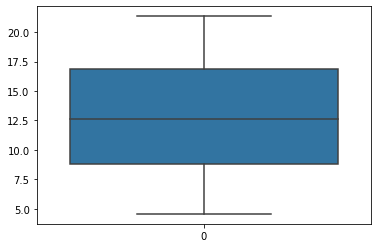

In [10]:
sns.boxplot(df.Item_Weight)

- It seems there are no outliers, hence it is safe to impute with the mean.

In [11]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)

In [12]:
# Imputing Outlet size with mode.
df.Outlet_Size.fillna(df.Outlet_Size.mode()[0],inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Visualization of Numeric Columns

In [14]:
nums = df.select_dtypes(include=['float64', 'int64']).columns.to_numpy()
nums

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'], dtype=object)

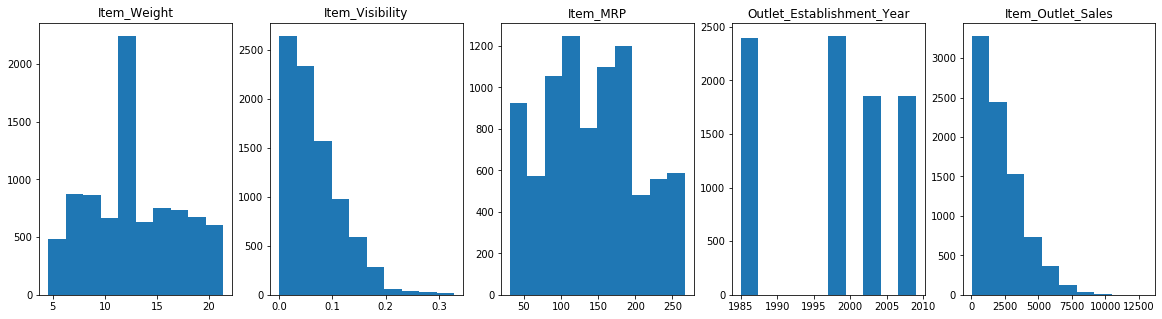

In [15]:
# Checking the distribution of the numeric Columns

fig, ax = plt.subplots(1, 5, figsize=(20, 5))

for i, col in enumerate(nums):
    ax[i].hist(df[col])
    ax[i].set_title(col)

- It seems that the Item Visibility and Item outlet sales columns are right skewed! 
- We can apply Data transformations to make them Normally distributed.

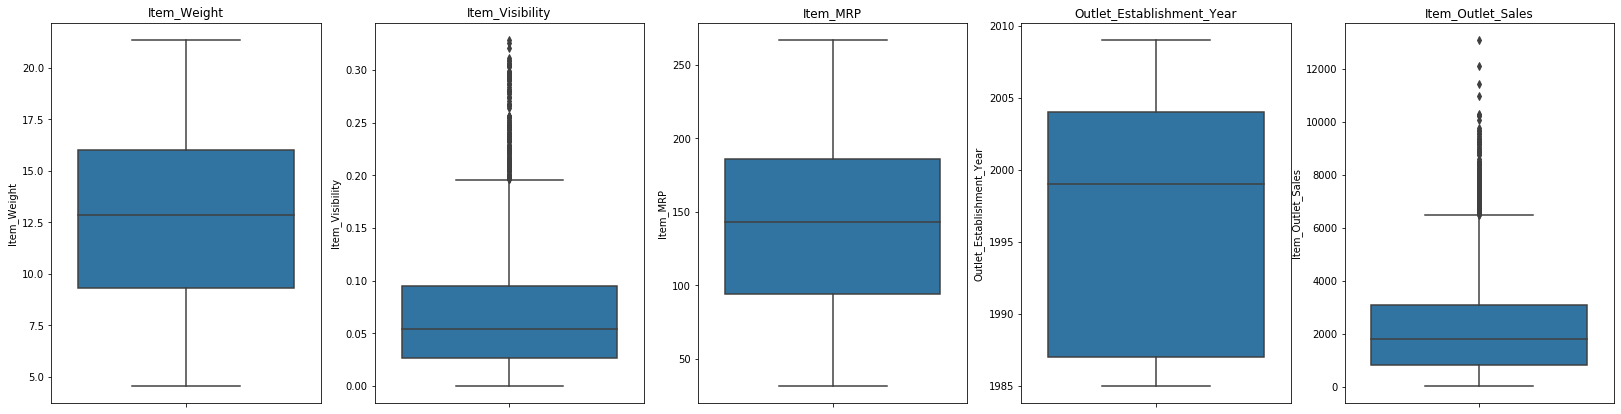

In [16]:
# Checking for outliers in the numeric columns

fig, ax = plt.subplots(1, 5, figsize=(28, 7))

for i, col in enumerate(nums):
    sns.boxplot(data=df, y=col, ax=ax[i])
    ax[i].set_title(col)

- It seems that the Item Visibility and Item outlet sales columns have some outliers which need to be handled!

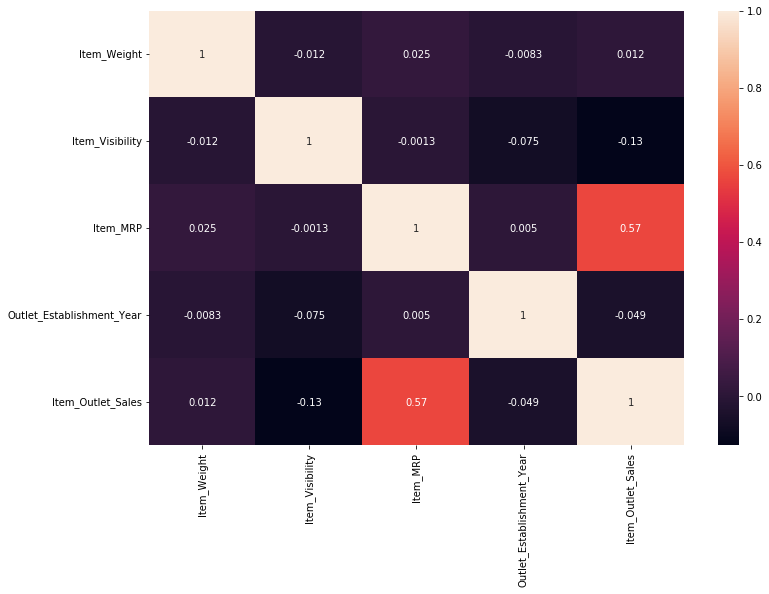

In [17]:
# Observing the relation between the numeric Columns

plt.figure(figsize=(12,8))
sns.heatmap(df[nums].corr(),annot=True)
plt.show()

## Feature Engineering of Numeric Columns

In [18]:
def remove_outliers(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + 1.5*iqr
    count_outliers = df[df[col] > upper_limit].shape[0]

    print(f'{count_outliers} outliers out of {df.shape[0]}. i.e; {count_outliers/df.shape[0]*100:.2f}% of outliers.')

    return df[df[col] < upper_limit]

In [19]:
df = remove_outliers('Item_Visibility')

144 outliers out of 8523. i.e; 1.69% of outliers.


In [20]:
df = remove_outliers('Item_Outlet_Sales')

186 outliers out of 8379. i.e; 2.22% of outliers.


In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


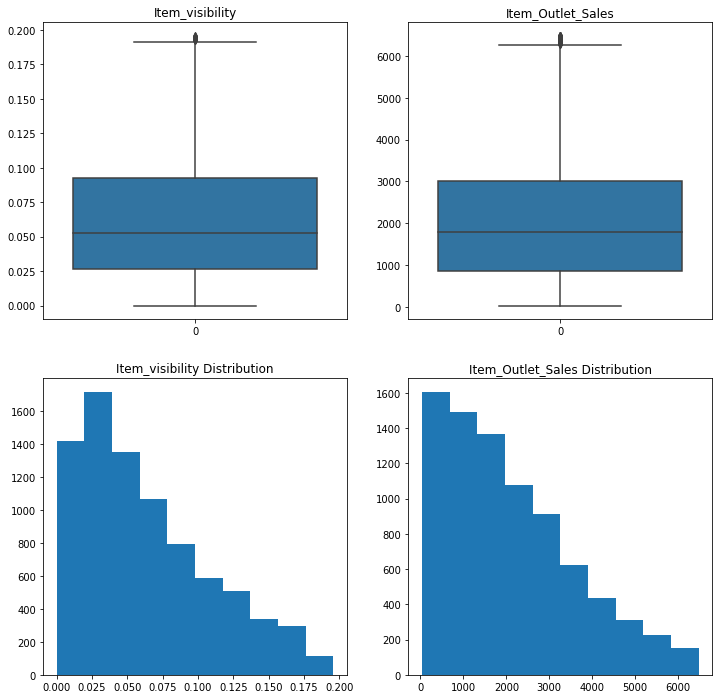

In [22]:
fig, ax = plt.subplots(2,2,figsize=(12,12))

sns.boxplot(df.Item_Visibility,ax=ax[0,0])
ax[0,0].set_title('Item_visibility')

sns.boxplot(df.Item_Outlet_Sales,ax=ax[0,1])
ax[0,1].set_title('Item_Outlet_Sales')

ax[1,0].hist(df.Item_Visibility)
ax[1,0].set_title('Item_visibility Distribution')

ax[1,1].hist(df.Item_Outlet_Sales)
ax[1,1].set_title('Item_Outlet_Sales Distribution')
plt.show()

In [23]:
log_item = np.log(df.Item_Visibility)

In [24]:
# AFter log, it is having negative values, hence to check the distribution, removing outliers.
q1 = log_item.quantile(0.25)
q3 = log_item.quantile(0.75)
iqr = q3-q1

ll = iqr + 1.5*q1

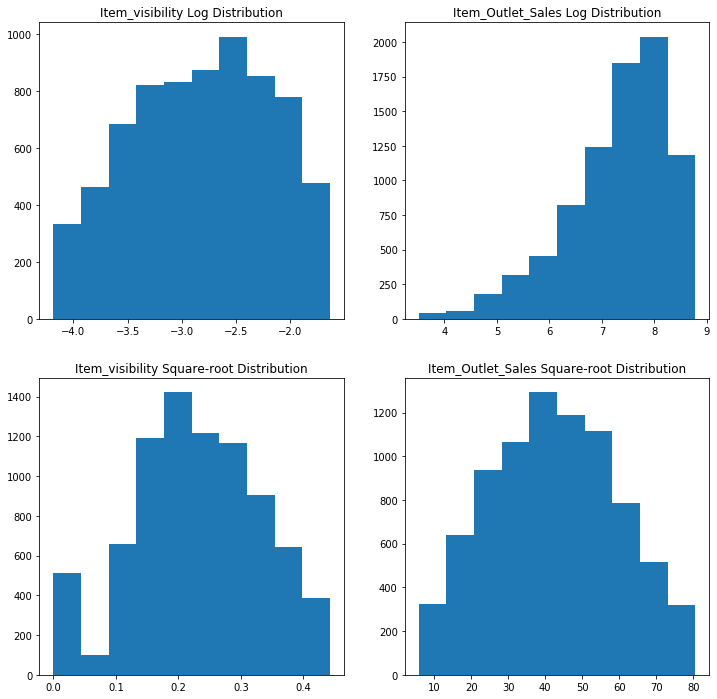

In [25]:
fig, ax1 = plt.subplots(2,2,figsize=(12,12))

ax1[0,0].hist(log_item[log_item>ll])
ax1[0,0].set_title('Item_visibility Log Distribution')

ax1[0,1].hist(np.log(df.Item_Outlet_Sales))
ax1[0,1].set_title('Item_Outlet_Sales Log Distribution')

ax1[1,0].hist(np.sqrt(df.Item_Visibility))
ax1[1,0].set_title('Item_visibility Square-root Distribution')

ax1[1,1].hist(np.sqrt(df.Item_Outlet_Sales))
ax1[1,1].set_title('Item_Outlet_Sales Square-root Distribution')

plt.show()

- Compartively, we can say that applying square root have made them normally distributed. And hence, we can transform them with square root.

In [26]:
df.Item_Visibility = np.sqrt(df.Item_Visibility)
df.Item_Outlet_Sales = np.sqrt(df.Item_Outlet_Sales)

In [27]:
# Outlet establishment year will be much useful, if we can convert that to the no of years since started.
df['nof_years']=2023-df.Outlet_Establishment_Year

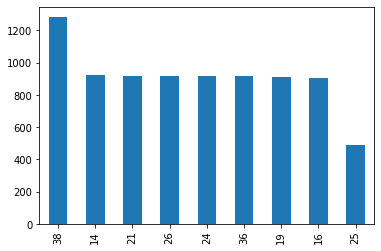

In [28]:
df.nof_years.value_counts().plot(kind='bar')
plt.show()

In [29]:
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,nof_years
0,FDA15,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,61.115775,24
1,DRC01,5.92,Regular,0.138846,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,21.057607,14
2,FDN15,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,45.795961,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,27.062520,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,31.538947,36


## Data Visualization of Categorical Columns

In [31]:
cat_cols = df.select_dtypes(include='object').columns.to_numpy()

In [32]:
cat_cols

array(['Item_Identifier', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'], dtype=object)

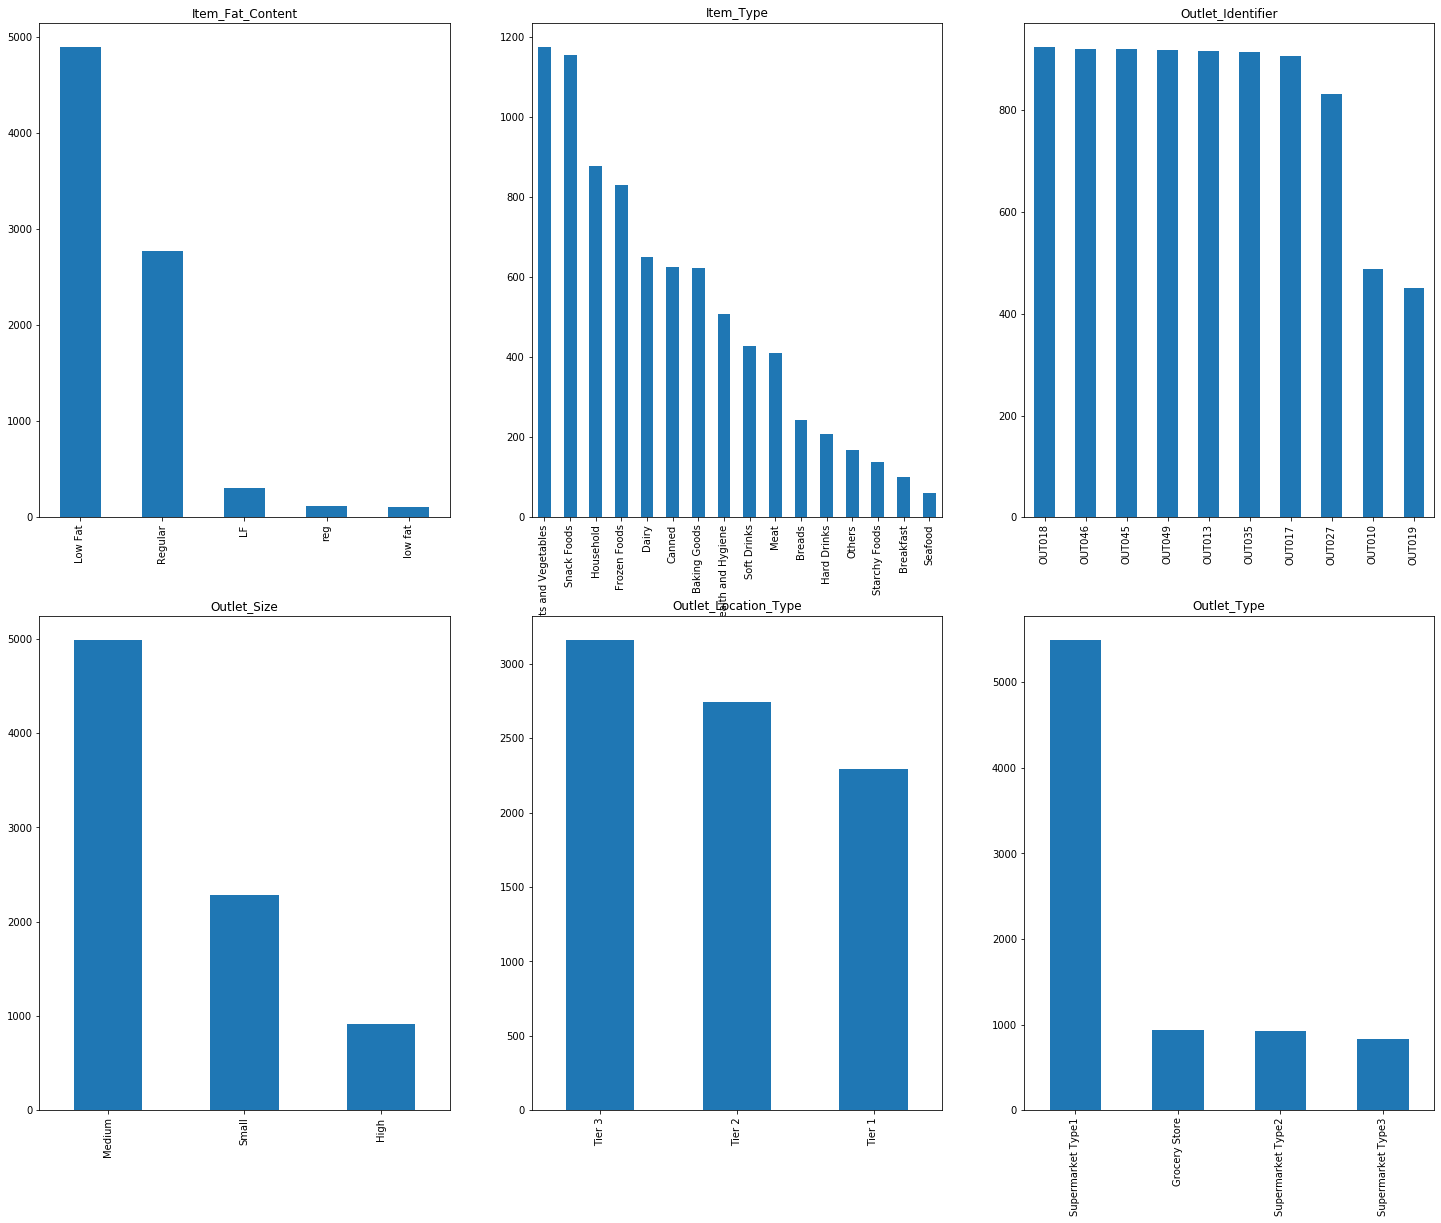

In [33]:
fig, ax = plt.subplots(2,3,figsize=(25,20))
a,b=0,0
for i,col in enumerate(cat_cols[1:]):
    if a!=1:
        df[col].value_counts().plot(kind='bar',ax=ax[a,b])
        ax[a,b].set_title(col)
        if b==2: a,b=1,0
        else: b+=1
    else:
        df[col].value_counts().plot(kind='bar',ax=ax[a,b])
        ax[a,b].set_title(col)
        b+=1

- So it seems, Low fat is recorded in 3 different names, and regular is recorded in two diff names.
- Outlet_Size, Item_Fat_Content, Outlet_Type, Outlet_Location_Type seems to be ordinal, and hence they can be label encoded.
- Item_Type, Outlet_Identifier can be one hot encoded.

## Feature Engineering Categorical Columns

In [34]:
df.select_dtypes(include='object').head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1



- If we see the item identifier, the first characters of it are basically the categories, so we can categorize them in that way.

In [35]:
df['Item_Categories'] = df['Item_Identifier'].str[0:2]
df.drop('Item_Identifier',axis=1,inplace=True)

In [36]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

- Indeed they seem to repeated due to human error.

In [37]:
df['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [38]:
df.Item_Fat_Content.value_counts(dropna=False)

Low Fat    5309
Regular    2884
Name: Item_Fat_Content, dtype: int64

In [39]:
# Label Encoding outlet size column
df.Item_Fat_Content = df.Item_Fat_Content.map({'Regular': 0,'Low Fat': 1}).astype(int)

In [40]:
df.select_dtypes(include='object')['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [41]:
# Label Encoding outlet size column
df.Outlet_Size = df.Outlet_Size.map({'Small': 1,'Medium': 2,'High': 3}).astype(int)

In [42]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,nof_years,Item_Categories
0,9.30,1,0.126678,Dairy,249.8092,OUT049,2,Tier 1,Supermarket Type1,61.115775,24,FD
1,5.92,0,0.138846,Soft Drinks,48.2692,OUT018,2,Tier 3,Supermarket Type2,21.057607,14,DR
2,17.50,1,0.129461,Meat,141.6180,OUT049,2,Tier 1,Supermarket Type1,45.795961,24,FD
3,19.20,0,0.000000,Fruits and Vegetables,182.0950,OUT010,2,Tier 3,Grocery Store,27.062520,25,FD
4,8.93,1,0.000000,Household,53.8614,OUT013,3,Tier 3,Supermarket Type1,31.538947,36,NC


In [43]:
df.select_dtypes(include='object')

,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Categories
0,Dairy,OUT049,Tier 1,Supermarket Type1,FD
1,Soft Drinks,OUT018,Tier 3,Supermarket Type2,DR
2,Meat,OUT049,Tier 1,Supermarket Type1,FD
3,Fruits and Vegetables,OUT010,Tier 3,Grocery Store,FD
4,Household,OUT013,Tier 3,Supermarket Type1,NC
...,...,...,...,...,...
8518,Snack Foods,OUT013,Tier 3,Supermarket Type1,FD
8519,Baking Goods,OUT045,Tier 2,Supermarket Type1,FD
8520,Health and Hygiene,OUT035,Tier 2,Supermarket Type1,NC
8521,Snack Foods,OUT018,Tier 3,Supermarket Type2,FD


In [44]:
# Label Encoding Outlet Location type and outlet type
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

In [45]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,nof_years,Item_Categories
0,9.30,1,0.126678,Dairy,249.8092,OUT049,2,0,1,61.115775,24,FD
1,5.92,0,0.138846,Soft Drinks,48.2692,OUT018,2,2,2,21.057607,14,DR
2,17.50,1,0.129461,Meat,141.6180,OUT049,2,0,1,45.795961,24,FD
3,19.20,0,0.000000,Fruits and Vegetables,182.0950,OUT010,2,2,0,27.062520,25,FD
4,8.93,1,0.000000,Household,53.8614,OUT013,3,2,1,31.538947,36,NC


In [46]:
df.select_dtypes(include='object')

,Item_Type,Outlet_Identifier,Item_Categories
0,Dairy,OUT049,FD
1,Soft Drinks,OUT018,DR
2,Meat,OUT049,FD
3,Fruits and Vegetables,OUT010,FD
4,Household,OUT013,NC
...,...,...,...
8518,Snack Foods,OUT013,FD
8519,Baking Goods,OUT045,FD
8520,Health and Hygiene,OUT035,NC
8521,Snack Foods,OUT018,FD


- Now we have to deal with other cat columns as Item_Type,Outlet_Identifier,Item_categories

In [47]:
# onehot encoding for the rest

df = pd.get_dummies(df, columns=['Item_Type', 'Item_Categories', 'Outlet_Identifier'])

In [48]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,nof_years,Item_Type_Baking Goods,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,1,0.126678,249.8092,2,0,1,61.115775,24,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0,0.138846,48.2692,2,2,2,21.057607,14,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,1,0.129461,141.6180,2,0,1,45.795961,24,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0,0.000000,182.0950,2,2,0,27.062520,25,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,3,2,1,31.538947,36,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8193 non-null   float64
 1   Item_Fat_Content                 8193 non-null   int32  
 2   Item_Visibility                  8193 non-null   float64
 3   Item_MRP                         8193 non-null   float64
 4   Outlet_Size                      8193 non-null   int32  
 5   Outlet_Location_Type             8193 non-null   int32  
 6   Outlet_Type                      8193 non-null   int32  
 7   Item_Outlet_Sales                8193 non-null   float64
 8   nof_years                        8193 non-null   int64  
 9   Item_Type_Baking Goods           8193 non-null   uint8  
 10  Item_Type_Breads                 8193 non-null   uint8  
 11  Item_Type_Breakfast              8193 non-null   uint8  
 12  Item_Type_Canned    

## Model Building

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [51]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [53]:
def scores(model):
    train_pred = model.predict(X_train)
    print(f'Score on Training dataset = {r2_score(y_train,train_pred)}')
    test_pred = model.predict(X_test)
    print(f'Score on Training dataset = {r2_score(y_test,test_pred)}')

## Simple Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
scores(lin_reg)

Score on Training dataset = 0.6383938275642018
Score on Training dataset = 0.6214603498517137


## Applying Regularization Techniques

The key difference is in how they assign penalties to the coefficients:

**Ridge Regression:**
    1. Performs L2 regularization, i.e., adds penalty equivalent to the square of the magnitude of coefficients
    2. Minimization objective = LS Obj + α * (sum of square of coefficients)

**Lasso Regression:**
    1. Performs L1 regularization, i.e., adds penalty equivalent to the absolute value of the magnitude of coefficients
    2. Minimization objective = LS Obj + α * (sum of the absolute value of coefficients)

- Here, LS Obj refers to the ‘least squares objective,’ i.e., the linear regression objective without regularization.

In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)
scores(ridge)

Score on Training dataset = 0.6383934083247518
Score on Training dataset = 0.6214350758753172


In [56]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
scores(lasso)

Score on Training dataset = 0.4981745084448651
Score on Training dataset = 0.46019129104610856


## Bossting Regressors

In [57]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)
scores(rfg)

Score on Training dataset = 0.9470717118105295
Score on Training dataset = 0.6022049030452542


- The Difference between the training score and the test score is huge, which indicatest that it is overfitting the data. 
- We can get the better scores for all these algorithms, by find the right suitable paramters through Hyperparameter Tuning.

## Hyperparameter Tuning the Models

### Hyperparameter Tuning Ridge

In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Initialize the Ridge model
ridge = Ridge()

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1,3,5,7,9,10],
    'fit_intercept': [True]
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'alpha': 10, 'fit_intercept': True}
Best score:  0.6351441341336047


In [59]:
ridge_best = Ridge(alpha=10)
ridge_best.fit(X_train,y_train)
scores(ridge_best)

Score on Training dataset = 0.6383536983989735
Score on Training dataset = 0.6211808846712839


### Hyperparameter Tuning Lasso

In [60]:
# Create a Lasso regressor
lasso = Lasso()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [1000, 2000, 3000]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False}


In [61]:
# Use the best parameters to create a new Lasso model
best_lasso = Lasso(**best_params)
best_lasso.fit(X_train,y_train)
scores(best_lasso)

Score on Training dataset = 0.6346292560442294
Score on Training dataset = 0.6184364337716537


## Hyperparameter Tuning Randomforest Regressor

In [62]:
# Create a RandomForestRegressor
rf = RandomForestRegressor()

# Define the hyperparameter grid with fewer parameters
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Use the best parameters to create a new RandomForestRegressor model
best_rf = RandomForestRegressor(**best_params)

# Fit the model with the best parameters
best_rf.fit(X_train, y_train)

scores(best_rf)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Score on Training dataset = 0.6660287032459365
Score on Training dataset = 0.6426640021495466


In [63]:
best_params

{'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 5}

- Of All these, we can random forest gave the best score after hyperparameter tuning. So we take the random forest to be as best model Regressor to be as best model.

## Saving the model

In [64]:
import joblib

# Save the trained model
joblib.dump(best_rf, 'random_forest_regressor.pkl')

['random_forest_regressor.pkl']